#### Libraries

In [63]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import nltk  
import random  
import string
import bs4 as bs  
import urllib.request  
import re
from wordcloud import WordCloud

Let's read our new dataset

In [64]:
data = pd.read_csv('./Data/bt_facial_care_products_final.csv')

In [3]:
data.head()

,Names,Links,Types,Brands,Prices,Capacities,Textures,Types of skin,Price per liter/kilogram/unit,Ingredients,Number of Correct Ingredients,Number of Not Great Ingredients,Number of Controversial Ingredients,Types_cat,Textures_cat,Types_of_skin_cat
0,Soin Revolumisant Intense Anti-Âge Jour - Revi...,https://www.beaute-test.com/soin-revolumisant-...,cremes_jour,L'Oréal Paris,11.08,50 ml,Crème,Toutes,358.0,"['AQUA', 'GLYCERIN', 'DIMETHICONE', 'ISOHEXADE...",19.0,13.0,0.0,2,3,7
1,Crème de Jour Anti-Rides Q10 - Cien,https://www.beaute-test.com/day_cream_q10_-_ci...,cremes_jour,Lidl,12.00,50 ml,Crème,Toutes,59.8,"['AQUA', 'DIBUTYL ADIPATE', 'GLYCERIN', 'ETHYL...",8.0,17.0,1.0,2,3,7
2,BB Crème,https://www.beaute-test.com/soin_miracle_perfe...,cremes_jour,Garnier,5.49,50 ml,Crème,Toutes,198.0,"['AQUA', 'ISONONYL ISONONANOATE', 'ISOHEXADECA...",16.0,15.0,3.0,2,3,7
3,BB Skin Detox Fluid SPF 25,https://www.beaute-test.com/bb-skin-detox-flui...,cremes_jour,Clarins,26.90,45 ml,Crème,Toutes,833.0,"['AQUA', 'DIMETHICONE', 'C10-13 ALKANE', 'CI 7...",12.0,17.0,1.0,2,3,7
4,Soin Global Anti-Rides Jour - Lift+ Algo Rétinol,https://www.beaute-test.com/soin-global-anti-r...,cremes_jour,Diadermine,12.05,50 ml,Crème,Toutes,246.0,"['AQUA', 'CAPRYLIC/CAPRIC TRIGLYCERIDE', 'GLYC...",1.0,7.0,0.0,2,3,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10572 entries, 0 to 10571
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Names                                10572 non-null  object 
 1   Links                                10572 non-null  object 
 2   Types                                10572 non-null  object 
 3   Brands                               10572 non-null  object 
 4   Prices                               10572 non-null  float64
 5   Capacities                           10572 non-null  object 
 6   Textures                             10572 non-null  object 
 7   Types of skin                        10572 non-null  object 
 8   Price per liter/kilogram/unit        10572 non-null  float64
 9   Ingredients                          10572 non-null  object 
 10  Number of Correct Ingredients        10572 non-null  float64
 11  Number of Not Great Ingredie

In [5]:
data.describe()

,Prices,Price per liter/kilogram/unit,Number of Correct Ingredients,Number of Not Great Ingredients,Number of Controversial Ingredients,Types_cat,Textures_cat,Types_of_skin_cat
count,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000
mean,30.927969,1027.951957,4.299092,6.213867,0.655127,5.850076,4.636776,5.587401
std,36.069417,1696.769397,5.412231,4.532495,1.285202,3.665559,2.811473,1.969550
min,0.450000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.775000,158.750000,0.000000,3.000000,0.000000,3.000000,3.000000,4.000000
50%,21.000000,527.000000,2.000000,6.000000,0.000000,5.000000,4.000000,7.000000
75%,38.900000,1197.000000,7.000000,9.000000,1.000000,9.000000,6.000000,7.000000
max,632.000000,38000.000000,37.000000,27.000000,11.000000,12.000000,16.000000,7.000000


In [6]:
data.loc[data['Price per liter/kilogram/unit']==38000]

,Names,Links,Types,Brands,Prices,Capacities,Textures,Types of skin,Price per liter/kilogram/unit,Ingredients,Number of Correct Ingredients,Number of Not Great Ingredients,Number of Controversial Ingredients,Types_cat,Textures_cat,Types_of_skin_cat
7710,Stylo Cleanance Spot Soin localisé,https://www.beaute-test.com/stylo_cleanance_sp...,soins_specifiques,Avène,7.8,0.25 g,Autre,Non applicable/Non renseigné,38000.0,"['ETHYLHEXYL PALMITATE', 'CERA MICROCRISTALLIN...",3.0,2.0,3.0,11,0,3


In [7]:
data.nunique()

Names                                  10252
Links                                  10553
Types                                     13
Brands                                  1592
Prices                                  2506
Capacities                               290
Textures                                  17
Types of skin                              8
Price per liter/kilogram/unit           2344
Ingredients                            10329
Number of Correct Ingredients             34
Number of Not Great Ingredients           28
Number of Controversial Ingredients       12
Types_cat                                 13
Textures_cat                              17
Types_of_skin_cat                          8
dtype: int64

In [8]:
data.isnull().sum()

Names                                  0
Links                                  0
Types                                  0
Brands                                 0
Prices                                 0
Capacities                             0
Textures                               0
Types of skin                          0
Price per liter/kilogram/unit          0
Ingredients                            0
Number of Correct Ingredients          0
Number of Not Great Ingredients        0
Number of Controversial Ingredients    0
Types_cat                              0
Textures_cat                           0
Types_of_skin_cat                      0
dtype: int64

#### Observations
- The dataset has 10 585 rows and 14 columns.
- The minimum price is 0,45€ (for facials masks).
- The minimum price per unit is 0.02€ (for eye makeup remover discs).
- The maximum price is 632€ (for a serum from La Prairie, a luxury brand).
- The maximum price per kg is 38 000€ (for a Pen Spot care)

## 1. Univariate analysis

#### Numerical variables

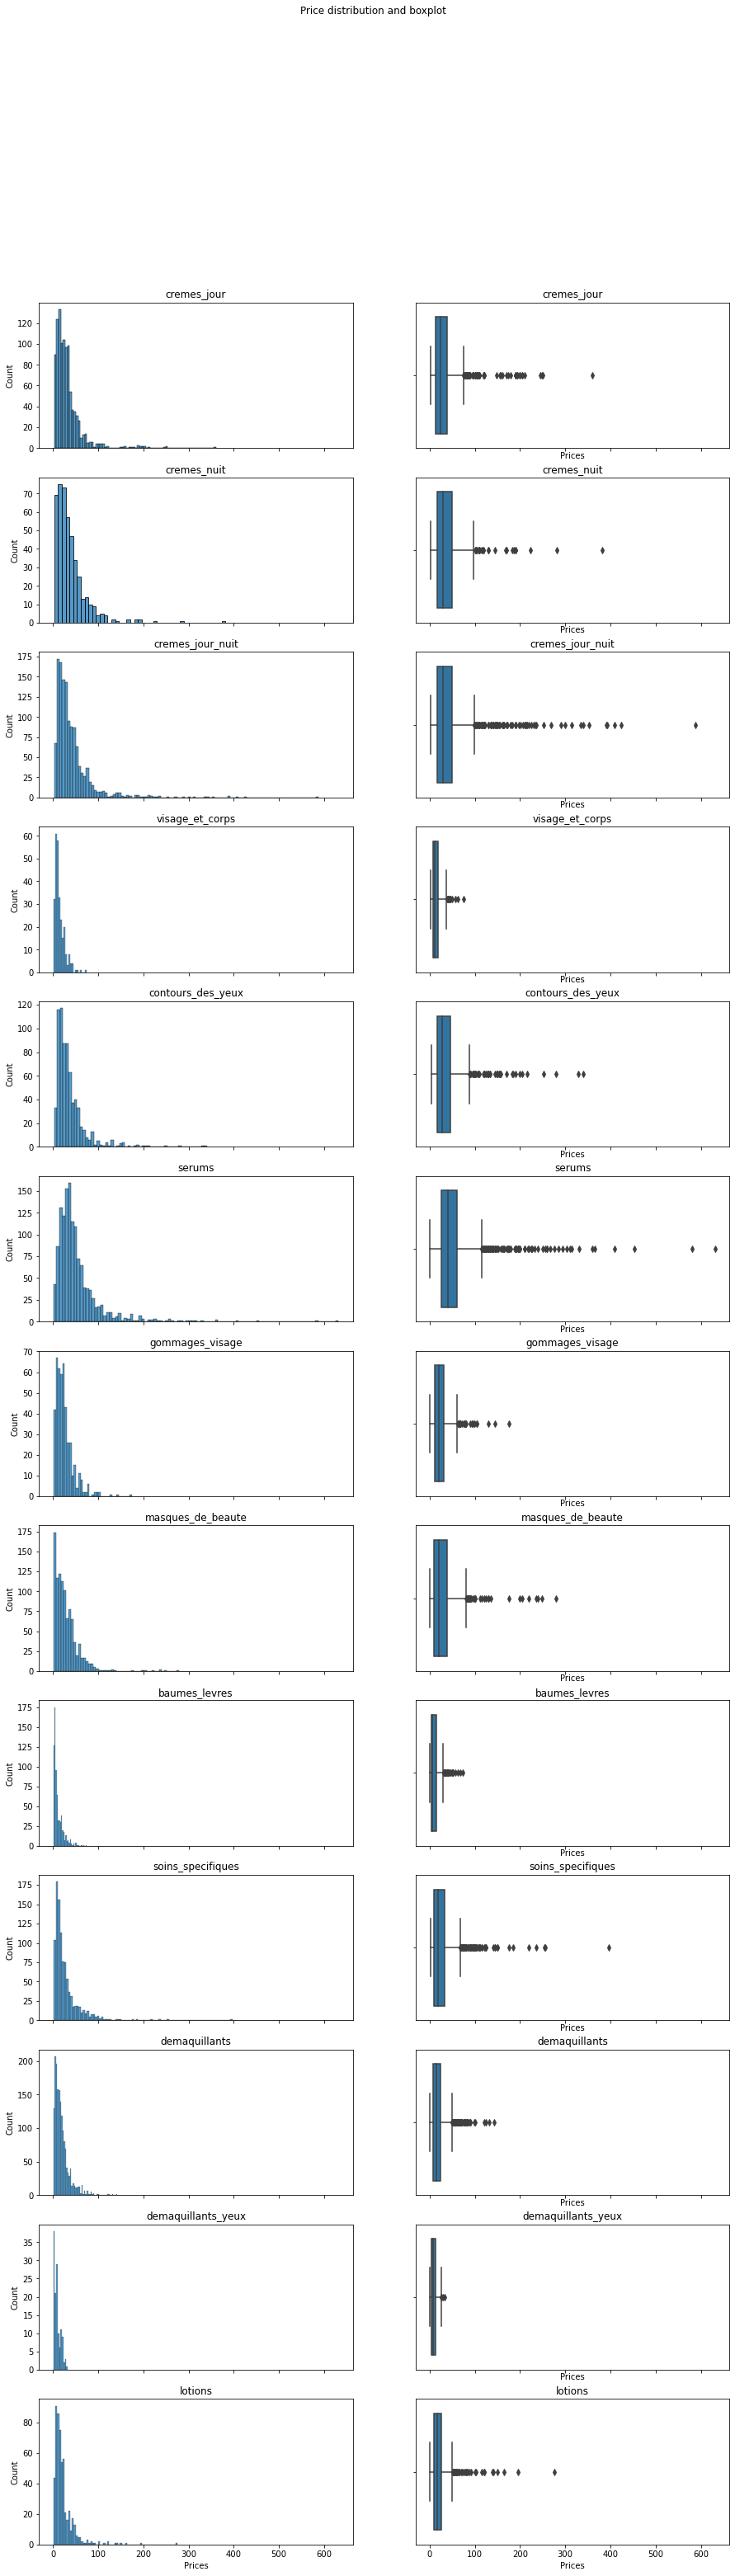

In [9]:
fig, axes = plt.subplots(13, 2, sharex=True, figsize=(15,50))
fig.suptitle('Price distribution and boxplot')
for i in range(len(data.Types.unique().tolist())):
    prices_stats = data.loc[data.Types == data.Types.unique().tolist()[i]]
    sns.histplot(ax=axes[i, 0], data=prices_stats.Prices)
    sns.boxplot(ax=axes[i, 1], x=prices_stats.Prices)
    axes[i, 0].set_title(data.Types.unique().tolist()[i])
    axes[i, 1].set_title(data.Types.unique().tolist()[i])
plt.savefig('./Graph/Price distribution and boxplot.png')

In [10]:
data.groupby(['Types'])['Prices'].mean()

Types
baumes_levres         10.564638
contours_des_yeux     37.584965
cremes_jour           32.050302
cremes_jour_nuit      42.531270
cremes_nuit           38.597051
demaquillants         18.838425
demaquillants_yeux     9.368692
gommages_visage       25.319037
lotions               22.415691
masques_de_beaute     28.351246
serums                52.780977
soins_specifiques     27.968452
visage_et_corps       14.677143
Name: Prices, dtype: float64

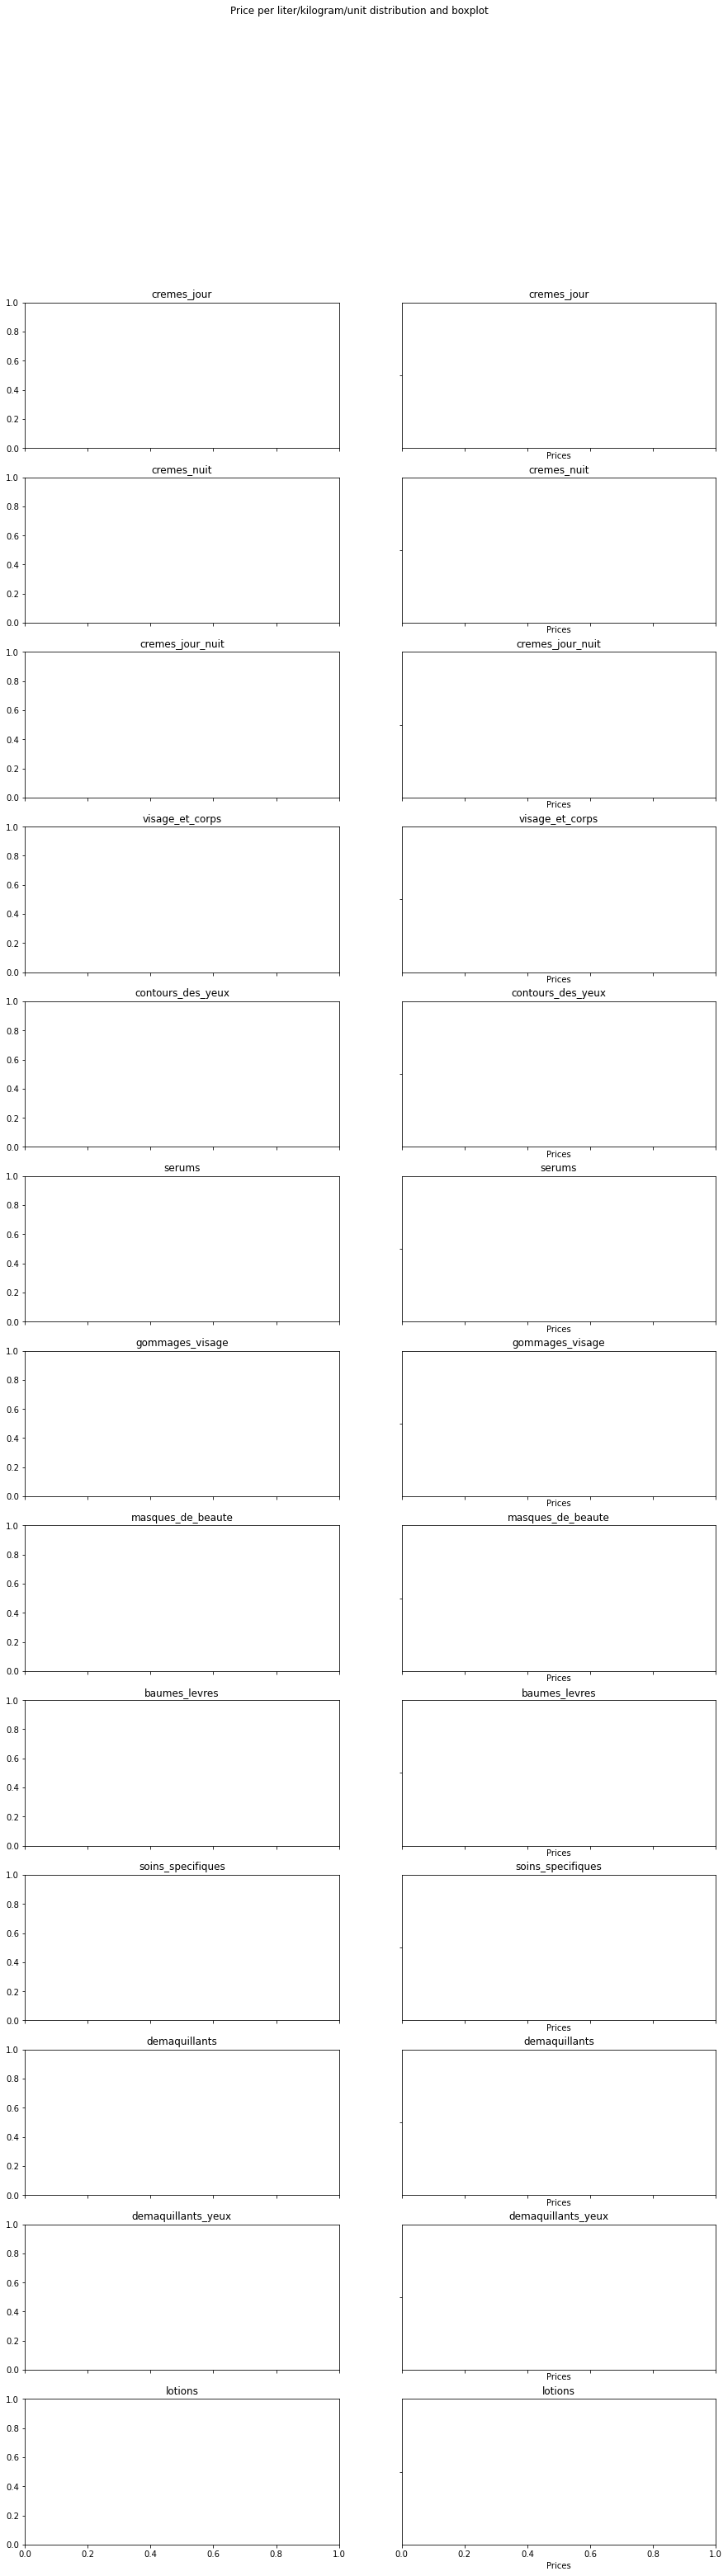

In [11]:
fig, axes = plt.subplots(13, 2, sharex=True, figsize=(15,50))
fig.suptitle('Price per liter/kilogram/unit distribution and boxplot')
for i in range(len(data.Types.unique().tolist())):
    prices_stats = data.loc[data.Types == data['Price per liter/kilogram/unit'].unique().tolist()[i]]
    sns.histplot(ax=axes[i, 0], data=prices_stats.Prices)
    sns.boxplot(ax=axes[i, 1], x=prices_stats.Prices)
    axes[i, 0].set_title(data.Types.unique().tolist()[i])
    axes[i, 1].set_title(data.Types.unique().tolist()[i])
plt.savefig('./Graph/Price per liter-kilogram-unit distribution and boxplot.png')

In [12]:
data.groupby(['Types'])['Price per liter/kilogram/unit'].mean()

Types
baumes_levres         2014.449986
contours_des_yeux     2686.851842
cremes_jour            821.604937
cremes_jour_nuit       999.747591
cremes_nuit           1009.423237
demaquillants          174.010940
demaquillants_yeux     101.538538
gommages_visage        423.278928
lotions                183.511952
masques_de_beaute      525.745737
serums                2082.372702
soins_specifiques      976.228362
visage_et_corps        240.961245
Name: Price per liter/kilogram/unit, dtype: float64

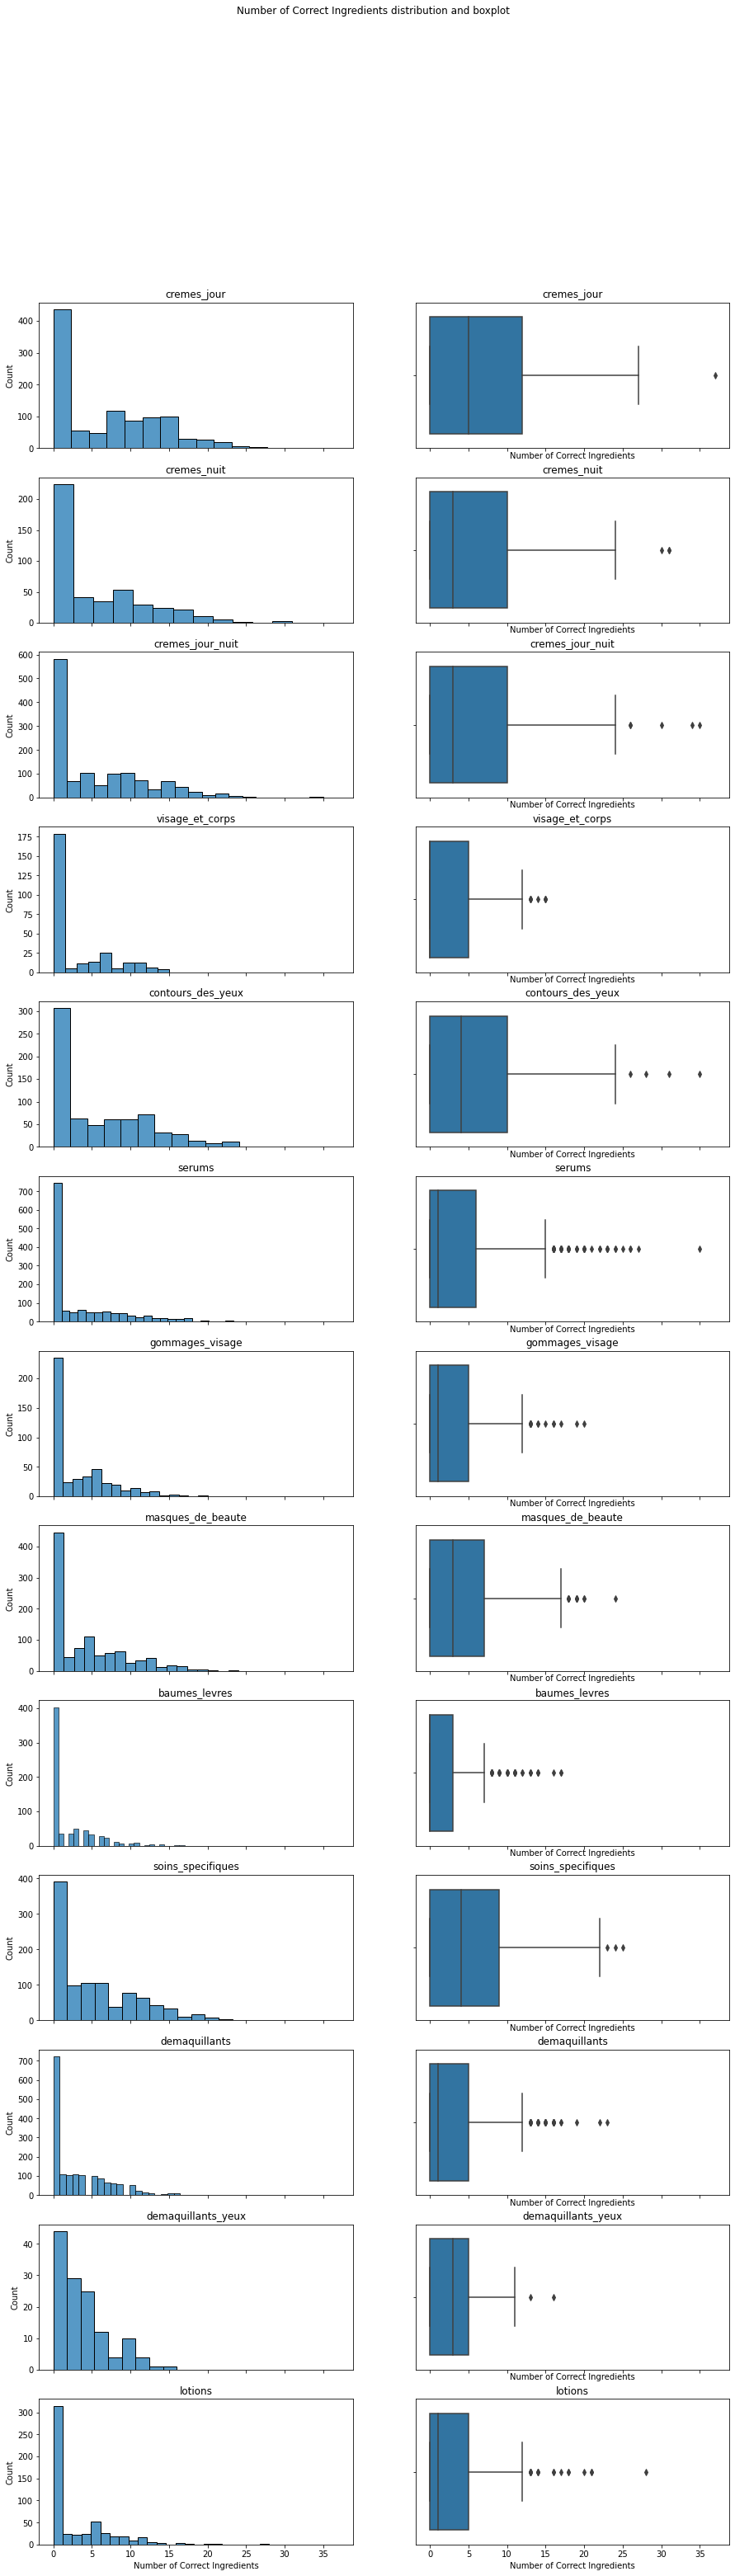

In [13]:
fig, axes = plt.subplots(13, 2, sharex=True, figsize=(15,50))
fig.suptitle('Number of Correct Ingredients distribution and boxplot')
for i in range(len(data.Types.unique().tolist())):
    prices_per_unit_stats = data.loc[data.Types == data.Types.unique().tolist()[i]]
    sns.histplot(ax=axes[i, 0], data=prices_per_unit_stats['Number of Correct Ingredients'])
    sns.boxplot(ax=axes[i, 1], x=prices_per_unit_stats['Number of Correct Ingredients'])
    axes[i, 0].set_title(data.Types.unique().tolist()[i])
    axes[i, 1].set_title(data.Types.unique().tolist()[i])
plt.savefig('./Graph/Number of Correct Ingredients distribution and boxplot.png')

In [14]:
data.groupby(['Types'])['Number of Correct Ingredients'].mean()

Types
baumes_levres         1.963768
contours_des_yeux     5.938115
cremes_jour           6.616585
cremes_jour_nuit      5.468629
cremes_nuit           5.363636
demaquillants         3.069597
demaquillants_yeux    3.653846
gommages_visage       3.109409
lotions               2.952118
masques_de_beaute     4.206726
serums                3.679497
soins_specifiques     5.146853
visage_et_corps       2.597070
Name: Number of Correct Ingredients, dtype: float64

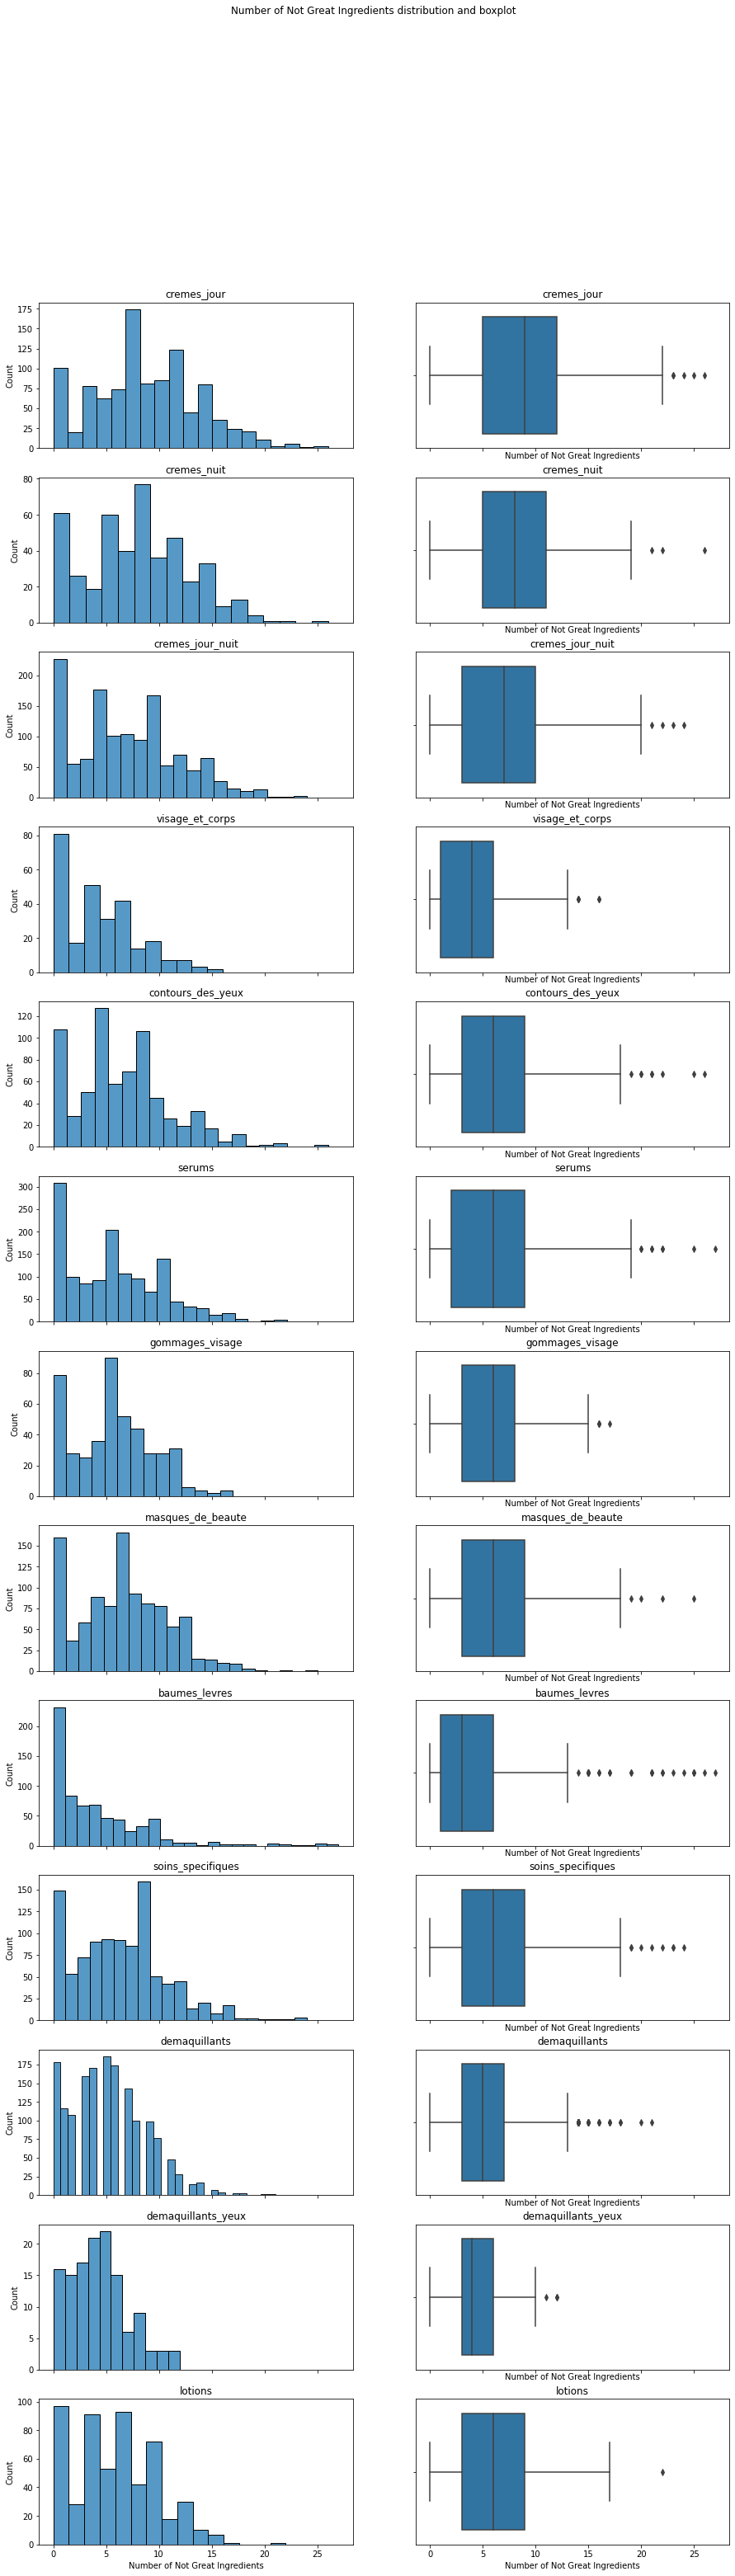

In [15]:
fig, axes = plt.subplots(13, 2, sharex=True, figsize=(15,50))
fig.suptitle('Number of Not Great Ingredients distribution and boxplot')
for i in range(len(data.Types.unique().tolist())):
    prices_per_unit_stats = data.loc[data.Types == data.Types.unique().tolist()[i]]
    sns.histplot(ax=axes[i, 0], data=prices_per_unit_stats['Number of Not Great Ingredients'])
    sns.boxplot(ax=axes[i, 1], x=prices_per_unit_stats['Number of Not Great Ingredients'])
    axes[i, 0].set_title(data.Types.unique().tolist()[i])
    axes[i, 1].set_title(data.Types.unique().tolist()[i])
plt.savefig('./Graph/Number of Not Great Ingredients distribution and boxplot.png')

In [16]:
data.groupby(['Types'])['Number of Not Great Ingredients'].mean()

Types
baumes_levres         4.102899
contours_des_yeux     6.547117
cremes_jour           8.722927
cremes_jour_nuit      6.981410
cremes_nuit           7.984479
demaquillants         5.205128
demaquillants_yeux    4.430769
gommages_visage       5.741794
lotions               5.738490
masques_de_beaute     6.524233
serums                5.772021
soins_specifiques     6.239760
visage_et_corps       4.285714
Name: Number of Not Great Ingredients, dtype: float64

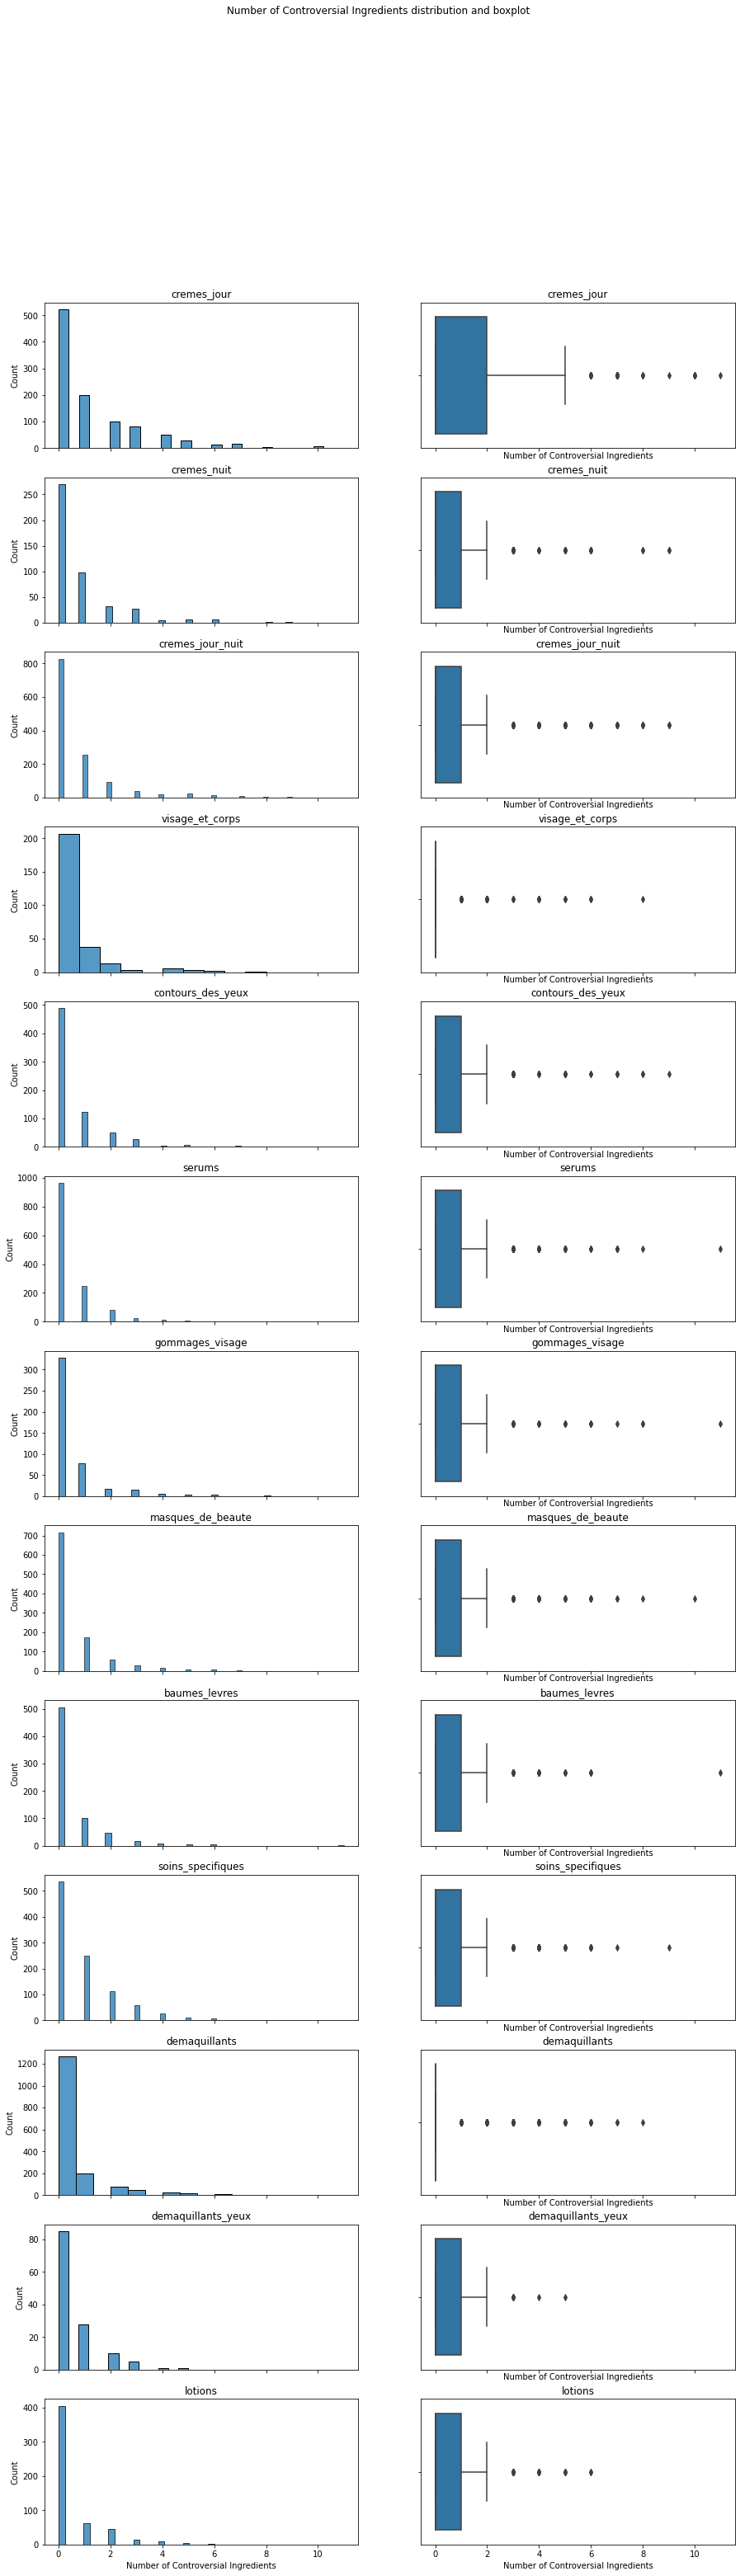

In [17]:
fig, axes = plt.subplots(13, 2, sharex=True, figsize=(15,50))
fig.suptitle('Number of Controversial Ingredients distribution and boxplot')
for i in range(len(data.Types.unique().tolist())):
    prices_per_unit_stats = data.loc[data.Types == data.Types.unique().tolist()[i]]
    sns.histplot(ax=axes[i, 0], data=prices_per_unit_stats['Number of Controversial Ingredients'])
    sns.boxplot(ax=axes[i, 1], x=prices_per_unit_stats['Number of Controversial Ingredients'])
    axes[i, 0].set_title(data.Types.unique().tolist()[i])
    axes[i, 1].set_title(data.Types.unique().tolist()[i])
plt.savefig('./Graph/Number of Controversial Ingredients distribution and boxplot.png')

In [18]:
data.groupby(['Types'])['Number of Controversial Ingredients'].mean()

Types
baumes_levres         0.488406
contours_des_yeux     0.594937
cremes_jour           1.262439
cremes_jour_nuit      0.759101
cremes_nuit           0.827051
demaquillants         0.438950
demaquillants_yeux    0.553846
gommages_visage       0.568928
lotions               0.493554
masques_de_beaute     0.546983
serums                0.480385
soins_specifiques     0.865135
visage_et_corps       0.483516
Name: Number of Controversial Ingredients, dtype: float64

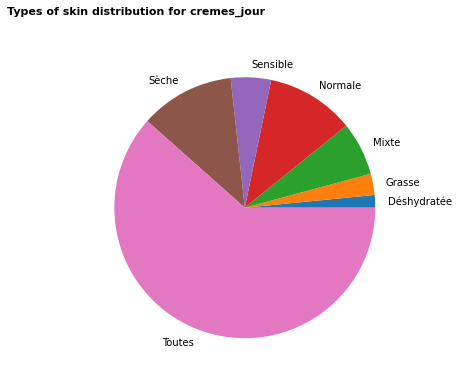

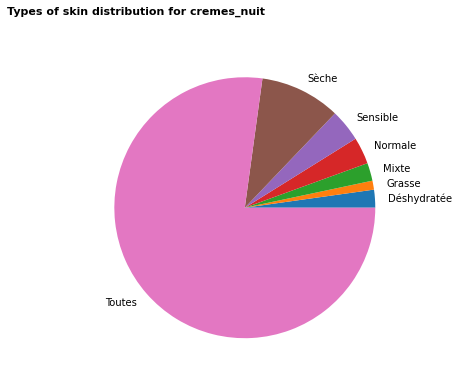

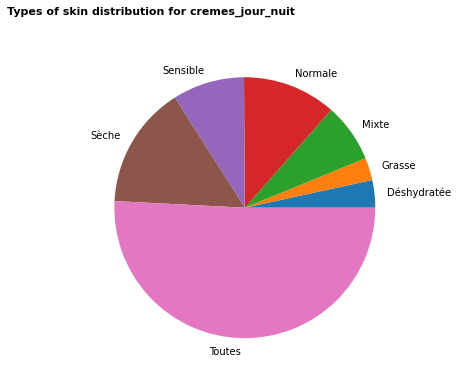

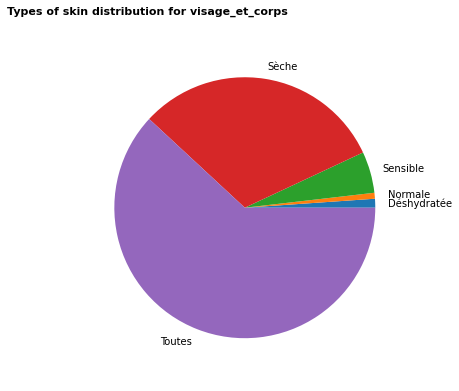

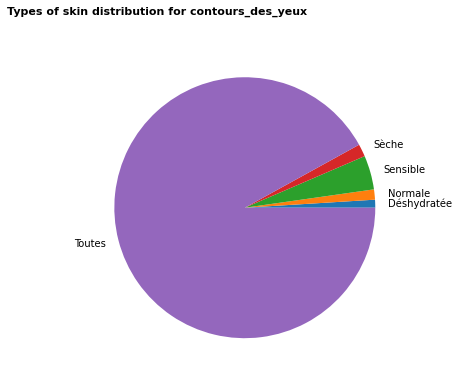

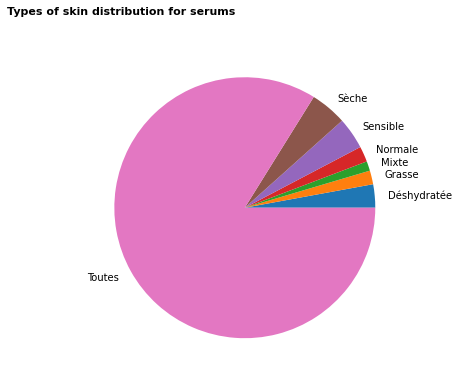

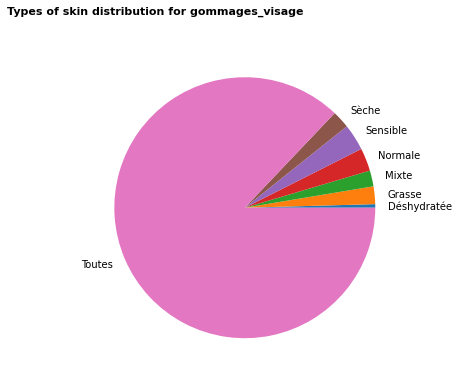

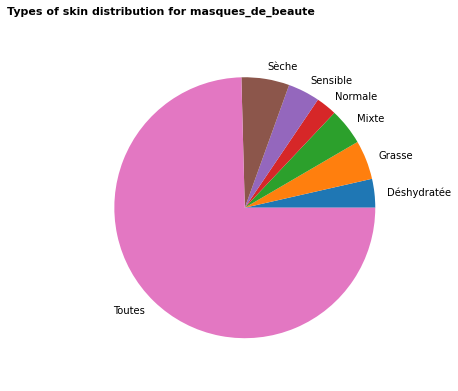

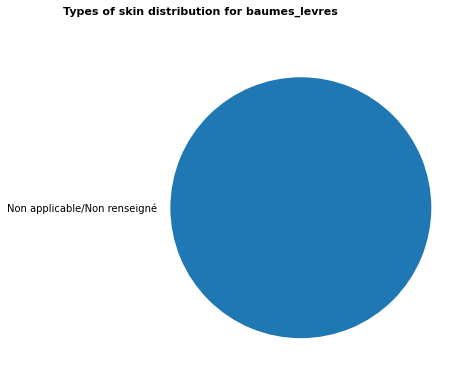

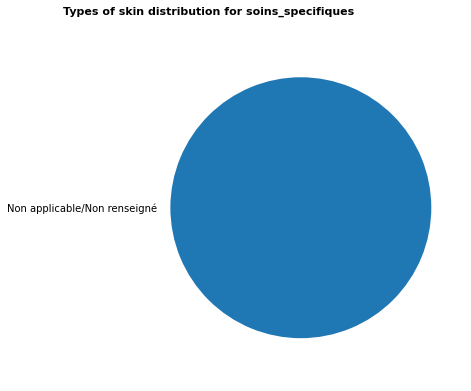

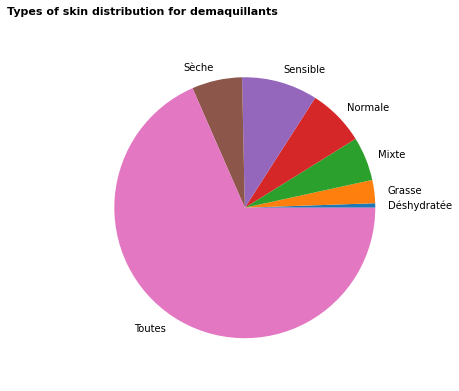

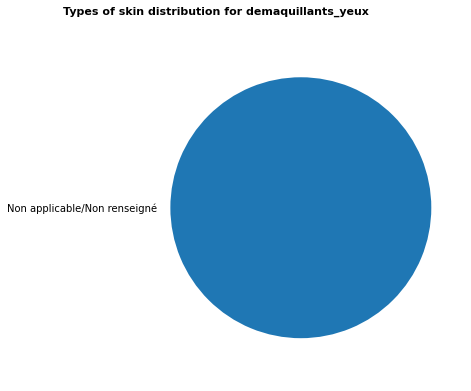

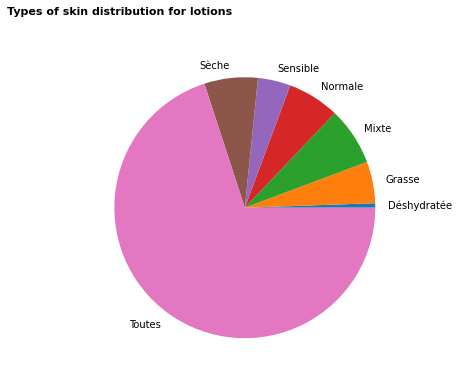

In [65]:
for type in data.Types.unique().tolist():
    fig, ax = plt.subplots(1,1, figsize=(8, 6))
    skintypes_stats = data.loc[data.Types == type].groupby('Types of skin')['Names'].count()
    skintypes_stats.plot.pie(y = 'Types of skin')
    fig.text(0.1, 0.95, f'Types of skin distribution for {type}', fontsize=11, fontweight='bold')
    plt.xlabel(' ', fontsize=9)
    plt.ylabel('')
    plt.yticks(fontsize=9)
    plt.box(False)
    plt.savefig('./Graph/Types of skin distribution for {}.png'.format(type))

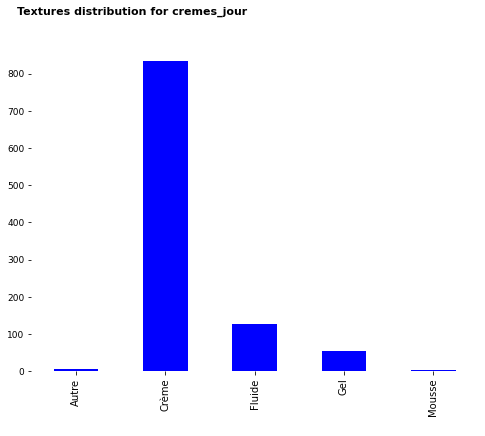

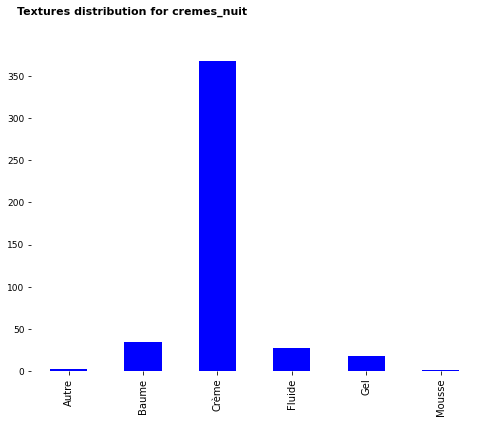

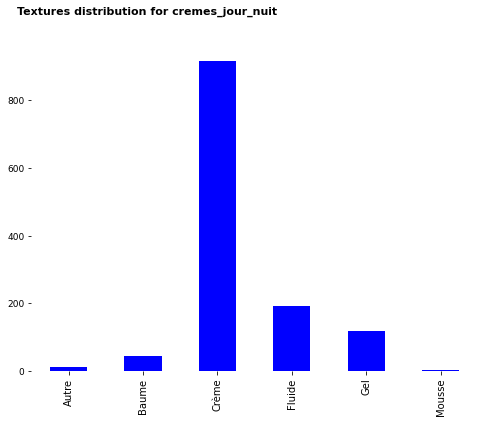

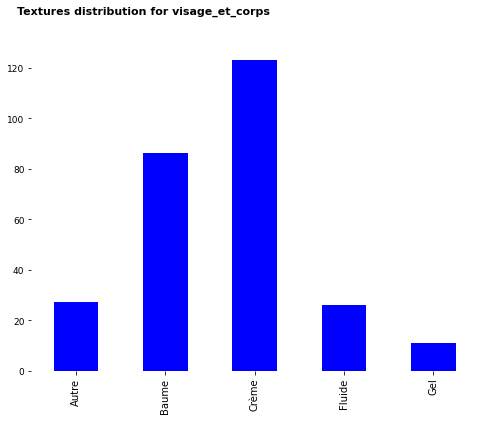

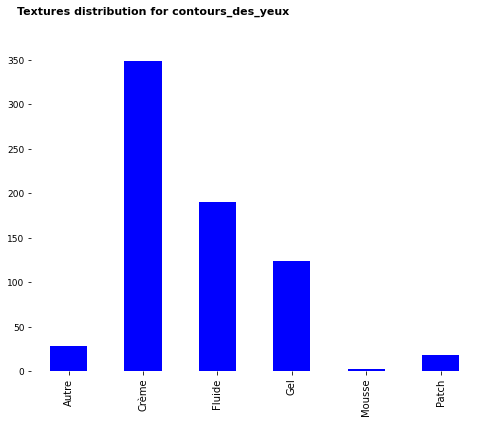

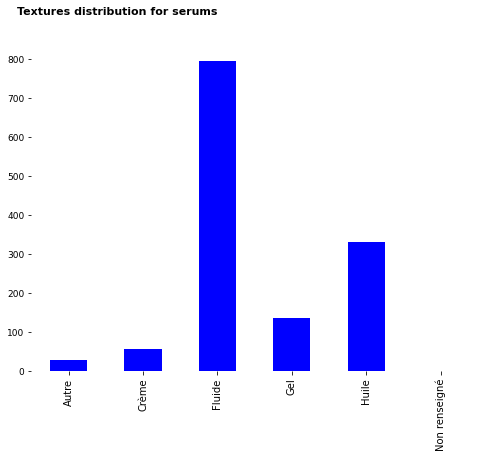

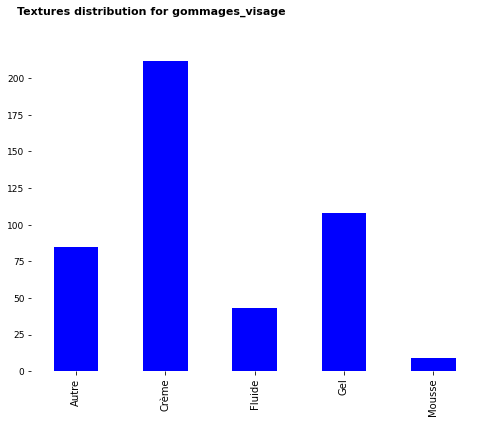

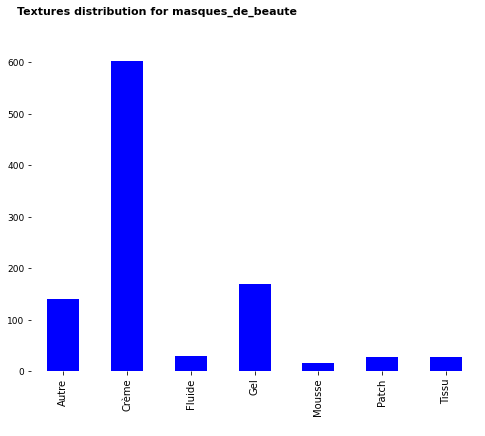

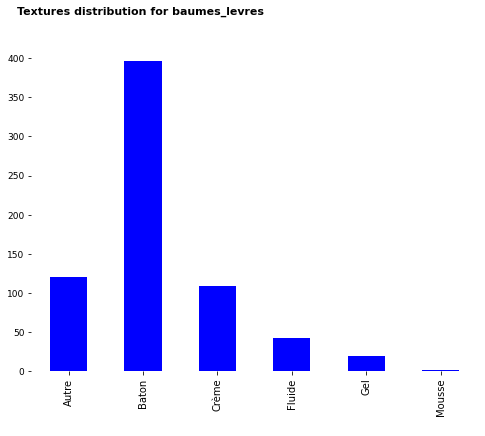

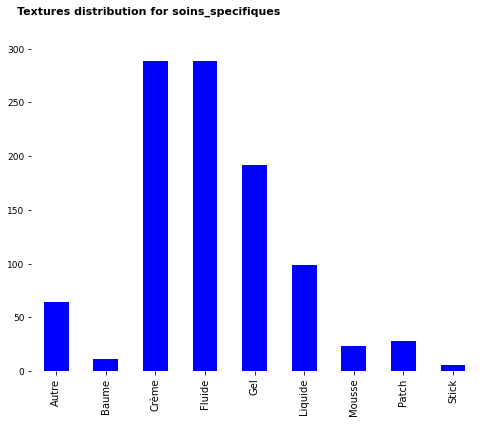

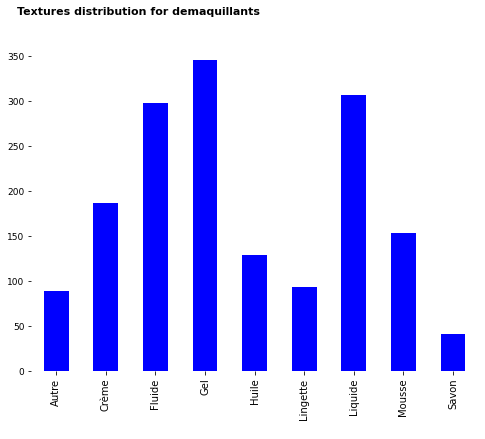

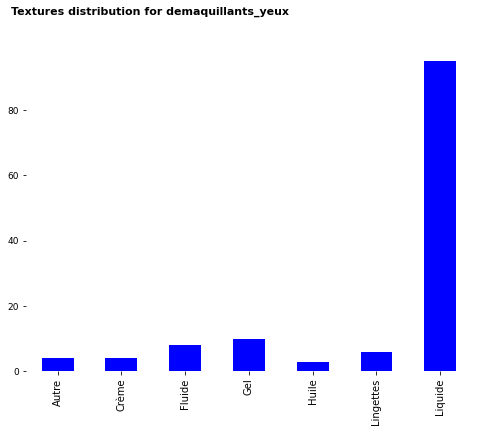

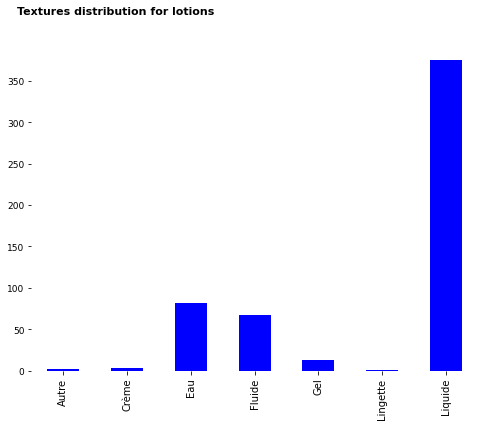

In [20]:
for type in data.Types.unique().tolist():
    fig, ax = plt.subplots(1,1, figsize=(8, 6))
    skintypes_stats = data.loc[data.Types == type].groupby('Textures')['Names'].count()
    skintypes_stats.plot.bar(color = 'blue')
    fig.text(0.1, 0.95, f'Textures distribution for {type}', fontsize=11, fontweight='bold')
    plt.xlabel(' ', fontsize=9)
    plt.ylabel('')
    plt.yticks(fontsize=9)
    plt.box(False)
    plt.savefig('./Graph/Textures distribution for {}.png'.format(type))

### Word cloud

In [21]:
#In the dataframe the ingredients is presented as a string representation of a list, we need to convert it
def convert_string_list_to_list(string_list):
    return [element.strip("'").strip() 
            for sublist in string_list
            for element in sublist.strip('][').split(', ')
            if element.strip("'").strip()]

In [33]:
creams = ['cremes_jour','cremes_nuit','cremes_jour_nuit','visage_et_corps','contours_des_yeux']
all_ingredients_creams = convert_string_list_to_list([sublist for cream in creams 
                                                      for sublist in data.loc[data.Types == cream].Ingredients.tolist()])

In [29]:
all_ingredients_serums = convert_string_list_to_list(data.loc[data.Types == 'serums'].Ingredients.tolist())
all_ingredients_gommages_visage = convert_string_list_to_list(data.loc[data.Types == 'gommages_visage'].Ingredients.tolist())
all_ingredients_masques_de_beaute = convert_string_list_to_list(data.loc[data.Types == 'masques_de_beaute'].Ingredients.tolist())
all_ingredients_baumes_levres = convert_string_list_to_list(data.loc[data.Types == 'baumes_levres'].Ingredients.tolist())
all_ingredients_soins_specifiques = convert_string_list_to_list(data.loc[data.Types == 'soins_specifiques'].Ingredients.tolist())
all_ingredients_demaquillants = convert_string_list_to_list([sublist for remover in ['demaquillants','demaquillants_yeux']
                                                             for sublist in data.loc[data.Types == remover].Ingredients.tolist()])
all_ingredients_lotions = convert_string_list_to_list(data.loc[data.Types == 'lotions'].Ingredients.tolist())

In [24]:
all_ingredients = [all_ingredients_creams, all_ingredients_serums, all_ingredients_gommages_visage,
                  all_ingredients_masques_de_beaute, all_ingredients_baumes_levres, all_ingredients_soins_specifiques,
                  all_ingredients_demaquillants, all_ingredients_lotions]

We're going to create a dictionary that contains ingredients and their corresponding frequencies

In [40]:
def plot_wordcloud(list_of_words):
    wordfreq = {}
    for word in list_of_words:
        tokens = nltk.word_tokenize(ing)
        for token in tokens:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1
                
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(wordfreq)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

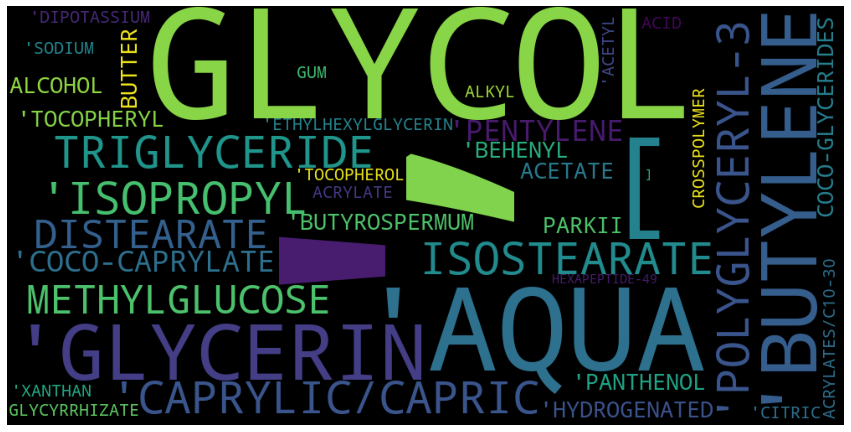

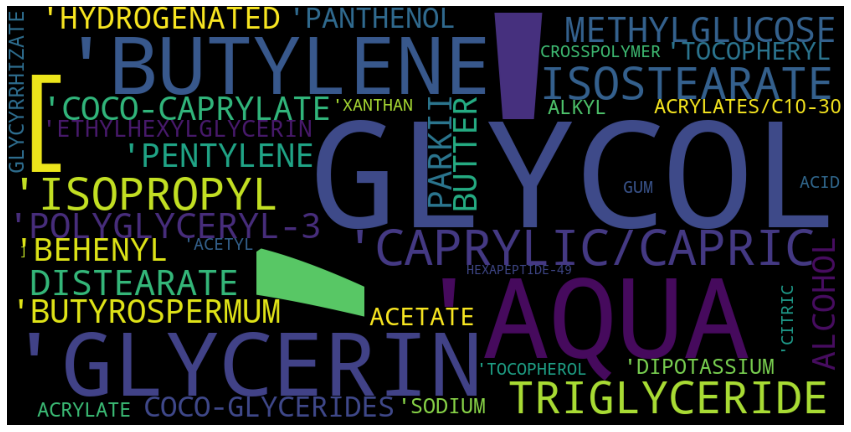

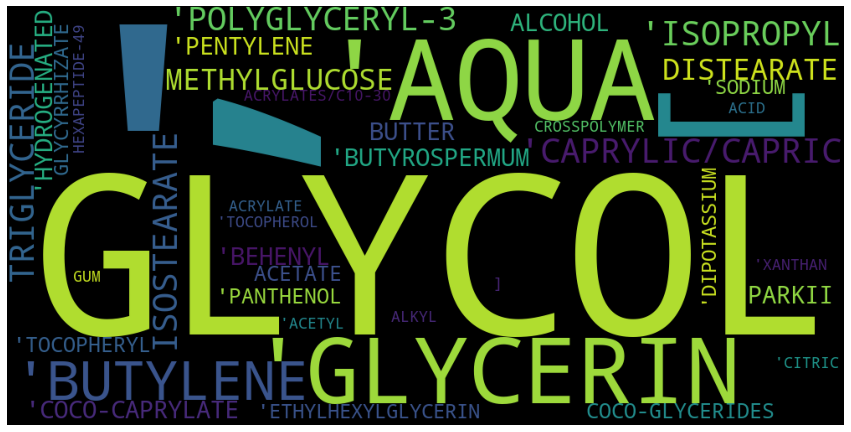

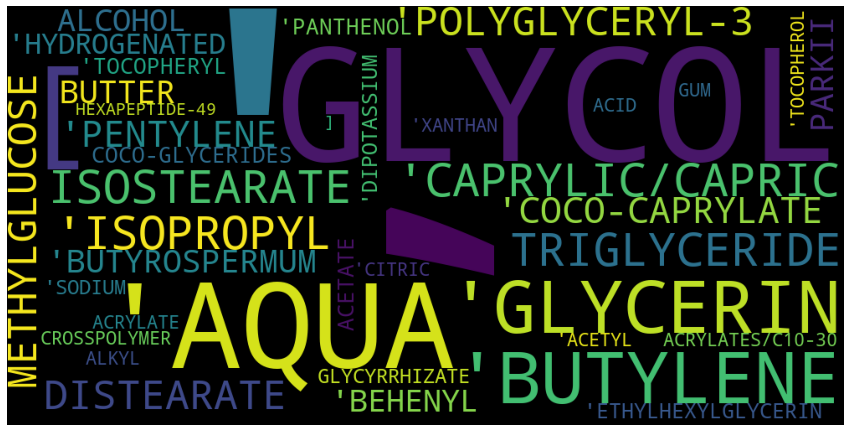

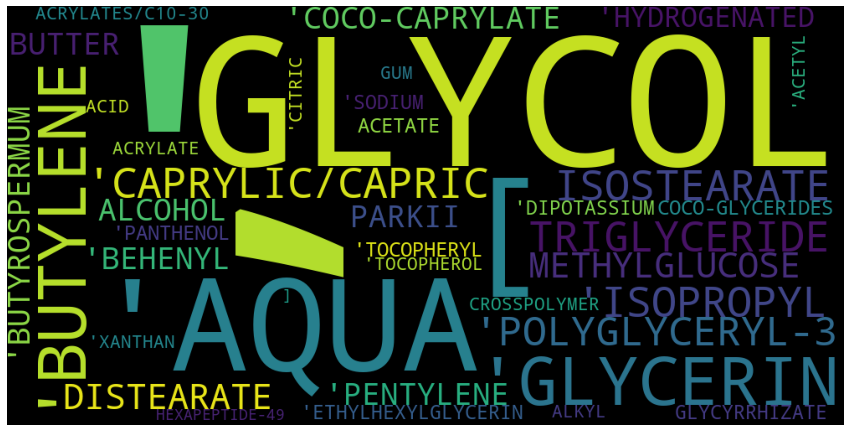

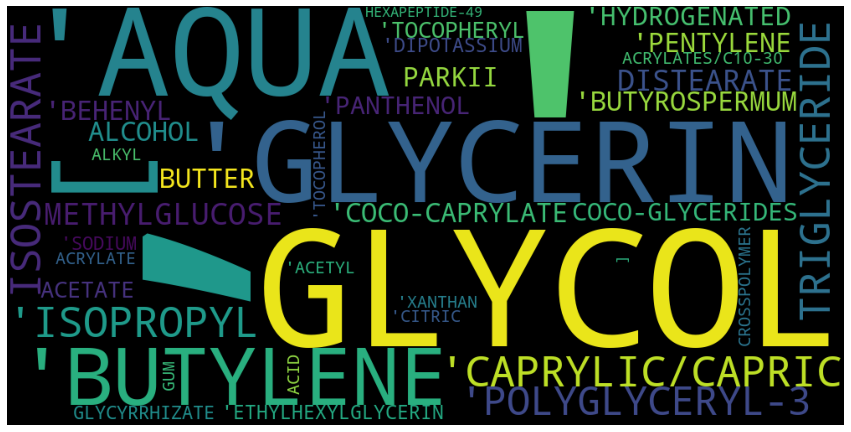

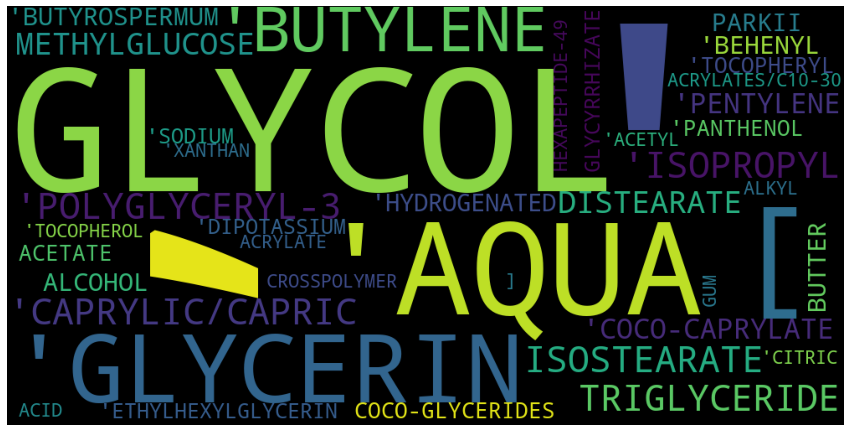

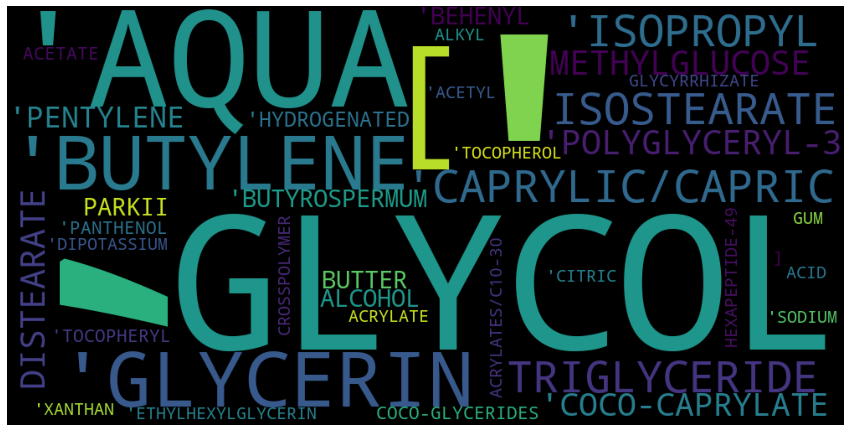

In [42]:
for i in range(len(all_ingredients)):
    plot_wordcloud(all_ingredients[i])
    plt.close()

## 2. Univariate analysis

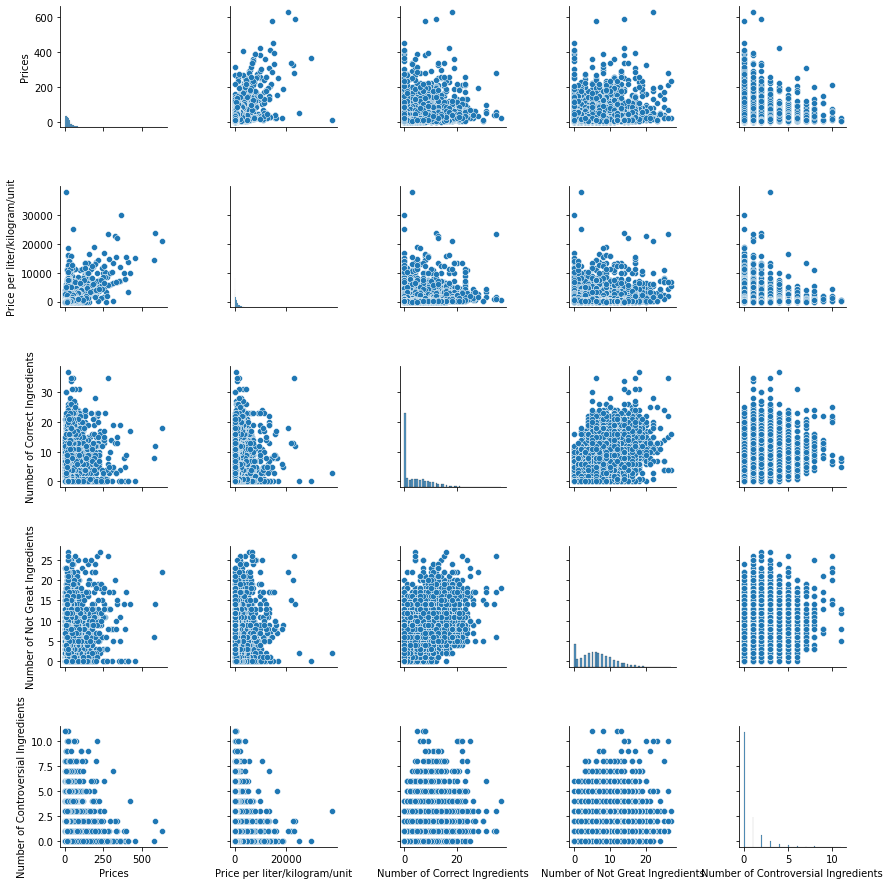

In [43]:
#We are creating df_numeric which will only contain the numerical variables
df_numeric = data[['Prices', 'Price per liter/kilogram/unit', 'Number of Correct Ingredients',
                  'Number of Not Great Ingredients', 'Number of Controversial Ingredients']]
sns.pairplot(df_numeric)
plt.show()

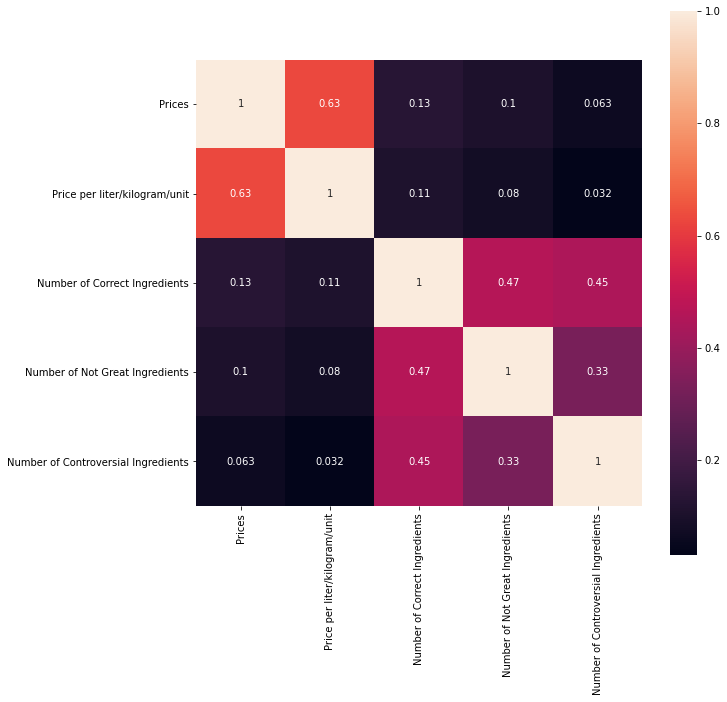

In [44]:
plt.figure(figsize=(10, 10))
p = sns.heatmap(df_numeric.corr(), annot=True, square=True)

In [45]:
df_controversial_ings_by_types = data.groupby(['Types'])['Number of Controversial Ingredients'].mean().reset_index()
df_not_great_ings_by_types = data.groupby(['Types'])['Number of Not Great Ingredients'].mean().reset_index()
df_correct_ings_by_types = data.groupby(['Types'])['Number of Correct Ingredients'].mean().reset_index()

In [68]:
df_controversial_ings_by_types = data.groupby(['Types'])['Number of Controversial Ingredients'].median().reset_index()
df_not_great_ings_by_types = data.groupby(['Types'])['Number of Not Great Ingredients'].median().reset_index()
df_correct_ings_by_types = data.groupby(['Types'])['Number of Correct Ingredients'].median().reset_index()

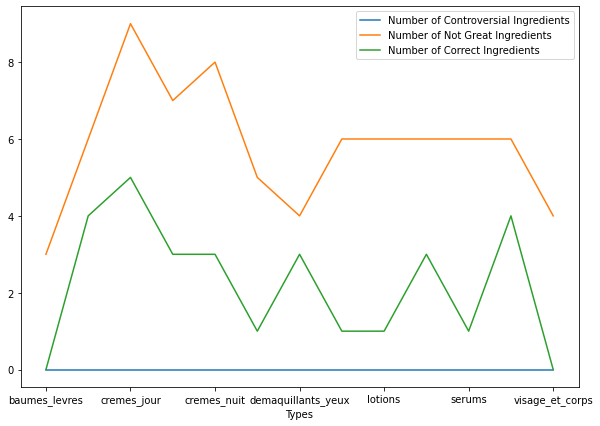

In [69]:
df_harmful_ing_by_types = df_controversial_ings_by_types
df_harmful_ing_by_types['Number of Not Great Ingredients'] = df_not_great_ings_by_types['Number of Not Great Ingredients']
df_harmful_ing_by_types['Number of Correct Ingredients'] = df_correct_ings_by_types['Number of Correct Ingredients']
df_harmful_ing_by_types.plot(x='Types', figsize=(10,7))

In [47]:
#Mean Number of Controversial Ingredients by types of product
df_controversial_ings_by_types.sort_values(by = 'Number of Controversial Ingredients', ascending = False)

,Types,Number of Controversial Ingredients,Number of Not Great Ingredients,Number of Correct Ingredients
2,cremes_jour,1.262439,8.722927,6.616585
11,soins_specifiques,0.865135,6.239760,5.146853
4,cremes_nuit,0.827051,7.984479,5.363636
3,cremes_jour_nuit,0.759101,6.981410,5.468629
1,contours_des_yeux,0.594937,6.547117,5.938115
7,gommages_visage,0.568928,5.741794,3.109409
6,demaquillants_yeux,0.553846,4.430769,3.653846
9,masques_de_beaute,0.546983,6.524233,4.206726
8,lotions,0.493554,5.738490,2.952118
0,baumes_levres,0.488406,4.102899,1.963768


In [48]:
#Mean Number of Not Great Ingredients by types of product
df_not_great_ings_by_types.sort_values(by = 'Number of Not Great Ingredients', ascending = False)

,Types,Number of Not Great Ingredients
2,cremes_jour,8.722927
4,cremes_nuit,7.984479
3,cremes_jour_nuit,6.981410
1,contours_des_yeux,6.547117
9,masques_de_beaute,6.524233
11,soins_specifiques,6.239760
10,serums,5.772021
7,gommages_visage,5.741794
8,lotions,5.738490
5,demaquillants,5.205128


In [49]:
#Mean Number of Correct Ingredients by types of product
df_correct_ings_by_types.sort_values(by = 'Number of Correct Ingredients', ascending = False)

,Types,Number of Correct Ingredients
2,cremes_jour,6.616585
1,contours_des_yeux,5.938115
3,cremes_jour_nuit,5.468629
4,cremes_nuit,5.363636
11,soins_specifiques,5.146853
9,masques_de_beaute,4.206726
10,serums,3.679497
6,demaquillants_yeux,3.653846
7,gommages_visage,3.109409
5,demaquillants,3.069597


In [50]:
def plot_top10_brands(df_top10):
    x = df_top10.index.tolist()
    y = df_top10.values.tolist()

    plt.figure(figsize=(8,6))
    plt.barh(x, y)

    for idx, value in enumerate(y):
        plt.text(value, idx, str(value))

In [51]:
df_top10_brands_controversial_ings = data.groupby(['Brands'])['Number of Controversial Ingredients'].mean().sort_values(axis=0, ascending=False).head(10)
df_top10_brands_controversial_ings.sort_values(axis=0, ascending=True, inplace=True)

Text(0.5, 1.0, 'Top 10 Brands using controversial ingredients')

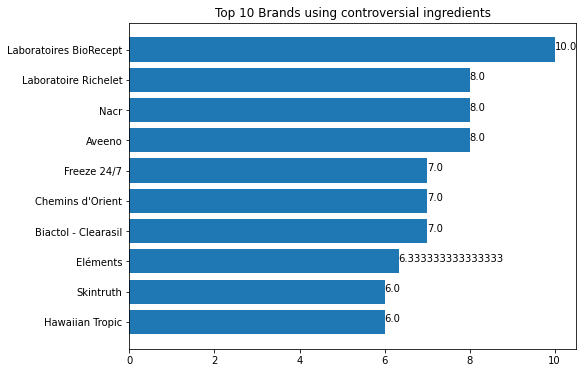

In [52]:
plot_top10_brands(df_top10_brands_controversial_ings)
plt.title('Top 10 Brands using controversial ingredients')

In [53]:
df_top10_brands_using_bad_ings = data.groupby(['Brands'])['Number of Not Great Ingredients'].mean().sort_values(axis=0, ascending=False).head(10)
df_top10_brands_using_bad_ings.sort_values(axis=0, ascending=True, inplace=True)

Text(0.5, 1.0, 'Top 10 Brands using bad ingredients')

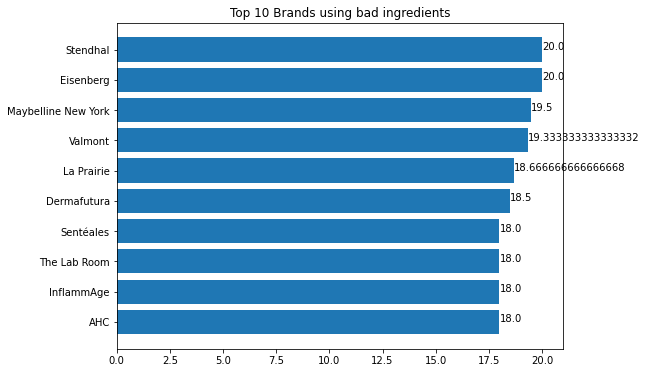

In [54]:
plot_top10_brands(df_top10_brands_using_bad_ings)
plt.title('Top 10 Brands using bad ingredients')

In [55]:
df_top10_brands_correct_ings = data.groupby(['Brands'])['Number of Correct Ingredients'].mean().sort_values(axis=0, ascending=False).head(10)
df_top10_brands_correct_ings.sort_values(axis=0, ascending=True, inplace=True)

Text(0.5, 1.0, 'Top 10 Brands using correct ingredients')

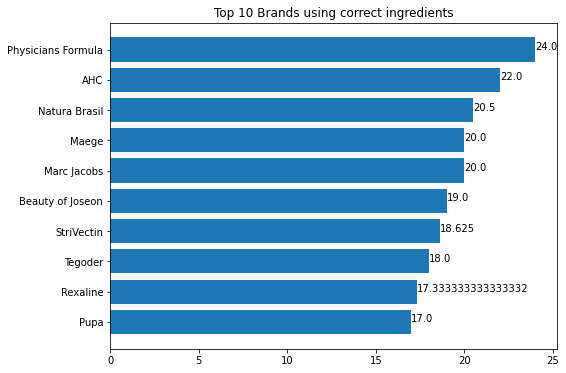

In [56]:
plot_top10_brands(df_top10_brands_correct_ings)
plt.title('Top 10 Brands using correct ingredients')

In [57]:
df_top10_most_expensive_brands =data.groupby(['Brands'])['Prices'].mean().sort_values(axis=0, ascending=False).head(10)
df_top10_most_expensive_brands.sort_values(axis=0, ascending=True, inplace=True)

Text(0.5, 1.0, 'Top 10 Most Expensive Brands (product price)')

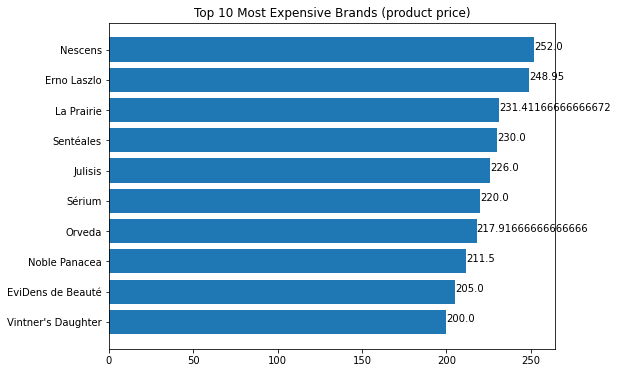

In [58]:
plot_top10_brands(df_top10_most_expensive_brands)
plt.title('Top 10 Most Expensive Brands (product price)')

In [59]:
df_most_expensive_brands = data.groupby(['Brands'])['Price per liter/kilogram/unit'].mean().sort_values(axis=0, ascending=False).head(10)
df_most_expensive_brands.sort_values(axis=0, ascending=True, inplace=True)

Text(0.5, 1.0, 'Top 10 Most Expensive Brands (product price per l/kg/u)')

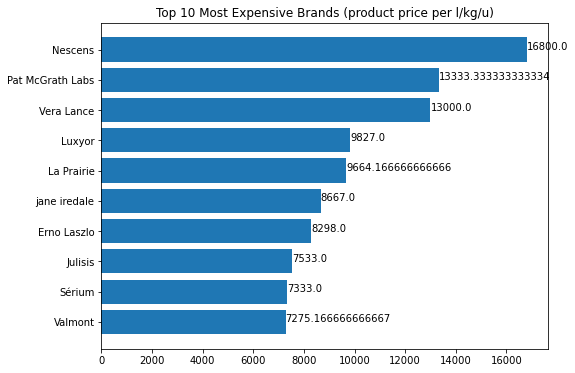

In [60]:
plot_top10_brands(df_most_expensive_brands)
plt.title('Top 10 Most Expensive Brands (product price per l/kg/u)')

In [61]:
df_top10_brands_with_more_products = data.groupby(['Brands'])['Names'].count().sort_values(axis=0, ascending=False).head(10)
df_top10_brands_with_more_products.sort_values(axis=0, ascending=True, inplace=True)

Text(0.5, 1.0, 'Top 10 Brands with more products')

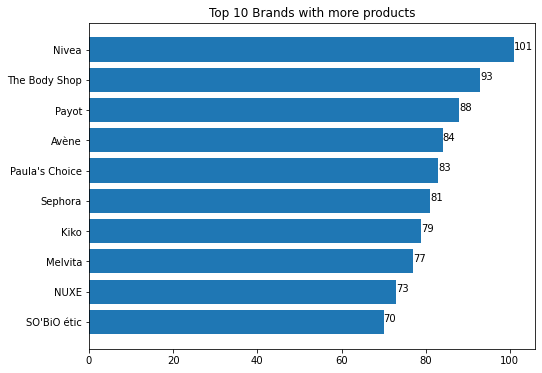

In [62]:
plot_top10_brands(df_top10_brands_with_more_products)
plt.title('Top 10 Brands with more products')